# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### survival	Survival	0 = No, 1 = Yes
#### pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#### sex	Sex	
#### Age	Age in years	
#### sibsp	# of siblings / spouses aboard the Titanic	
#### parch	# of parents / children aboard the Titanic	
#### ticket	Ticket number	
#### fare	Passenger fare	
#### embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

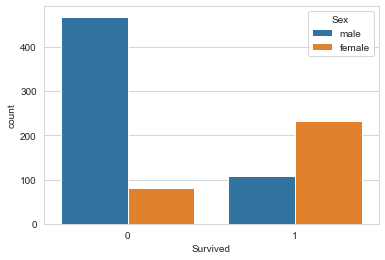

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

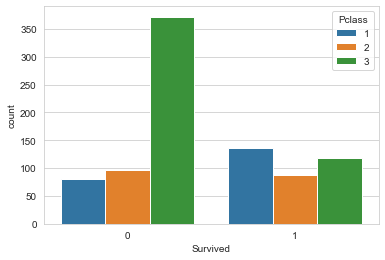

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

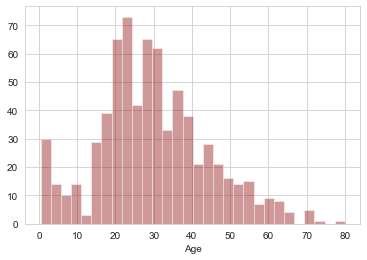

In [7]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

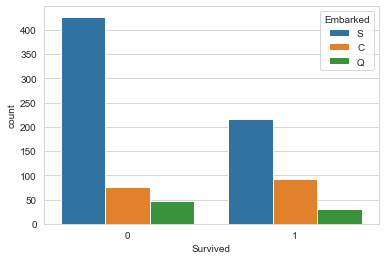

In [8]:
sns.countplot(x='Survived',hue='Embarked',data=train)

In [9]:
train['Age'].fillna(train['Age'].median(), inplace=True)

In [10]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
train.dropna(inplace=True)

## Converting Categorical Features

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [13]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [14]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [15]:
train = pd.concat([train,sex,embark],axis=1)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Build a logistic regression

In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression(penalty = 'l1')

In [22]:
logmodel.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
logmodel.coef_

array([[ 2.29007770e-04, -9.39087567e-01, -3.32392488e-02,
        -2.19772821e-01, -9.35851919e-02,  2.74112495e-03,
        -2.49833983e+00,  0.00000000e+00, -2.42976186e-01]])

In [30]:
logmodel.intercept_

array([4.20726071])

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [25]:
predictions_proba = logmodel.predict_proba(X_test)

In [26]:
predictions_proba

array([[0.89498455, 0.10501545],
       [0.8672876 , 0.1327124 ],
       [0.23135674, 0.76864326],
       [0.0869506 , 0.9130494 ],
       [0.86198753, 0.13801247],
       [0.95847278, 0.04152722],
       [0.87410645, 0.12589355],
       [0.7820783 , 0.2179217 ],
       [0.91307607, 0.08692393],
       [0.41643304, 0.58356696],
       [0.21486186, 0.78513814],
       [0.06103193, 0.93896807],
       [0.89186318, 0.10813682],
       [0.44108251, 0.55891749],
       [0.88664986, 0.11335014],
       [0.8638662 , 0.1361338 ],
       [0.09150106, 0.90849894],
       [0.17053554, 0.82946446],
       [0.44875508, 0.55124492],
       [0.89598549, 0.10401451],
       [0.90219542, 0.09780458],
       [0.91170361, 0.08829639],
       [0.55581396, 0.44418604],
       [0.70421049, 0.29578951],
       [0.93689636, 0.06310364],
       [0.56924981, 0.43075019],
       [0.44491215, 0.55508785],
       [0.44864212, 0.55135788],
       [0.89197726, 0.10802274],
       [0.72317416, 0.27682584],
       [0.

In [27]:
preds= predictions_proba[:,1]

In [28]:
preds

array([0.10501545, 0.1327124 , 0.76864326, 0.9130494 , 0.13801247,
       0.04152722, 0.12589355, 0.2179217 , 0.08692393, 0.58356696,
       0.78513814, 0.93896807, 0.10813682, 0.55891749, 0.11335014,
       0.1361338 , 0.90849894, 0.82946446, 0.55124492, 0.10401451,
       0.09780458, 0.08829639, 0.44418604, 0.29578951, 0.06310364,
       0.43075019, 0.55508785, 0.55135788, 0.10802274, 0.27682584,
       0.09964746, 0.31442877, 0.01866439, 0.10490027, 0.11809718,
       0.13003345, 0.72874233, 0.07135286, 0.11266854, 0.13322308,
       0.57081249, 0.15621786, 0.12626814, 0.9096937 , 0.64367297,
       0.12550552, 0.61199496, 0.86540961, 0.1102467 , 0.27363728,
       0.44216931, 0.79940587, 0.15869533, 0.14328439, 0.10692535,
       0.07123945, 0.40200464, 0.09158494, 0.10980317, 0.92598988,
       0.58050288, 0.93036109, 0.88489039, 0.10392833, 0.17444957,
       0.05312077, 0.12034186, 0.40042471, 0.05742186, 0.10595531,
       0.34113913, 0.11807871, 0.6276077 , 0.88082631, 0.09006

In [31]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

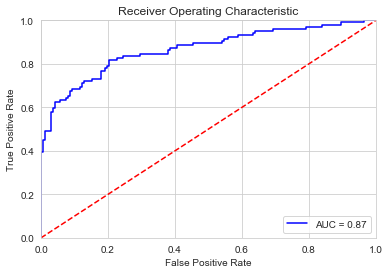

In [32]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [33]:
roc_auc

0.8668593676262388